In [1]:
dir0 = '/home/cloudera/2.kkbox_churn/data01/big_table_01/'
infile = dir0 + 'all-features_has-expired_auto-renew-0'

df0 = spark.read.format('parquet').load(infile)

In [2]:
df0.printSchema()

root
 |-- msno: string (nullable = true)
 |-- city: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- registered_via: string (nullable = true)
 |-- days_since_init_regist: integer (nullable = true)
 |-- init_date: string (nullable = true)
 |-- final_date: string (nullable = true)
 |-- gaps_count: integer (nullable = true)
 |-- total_gap_len: integer (nullable = true)
 |-- has_long_gap: boolean (nullable = true)
 |-- has_expired: boolean (nullable = true)
 |-- last_pay_method: string (nullable = true)
 |-- last_plan_days: integer (nullable = true)
 |-- last_list_price: integer (nullable = true)
 |-- last_actual_paid: integer (nullable = true)
 |-- last_discount: integer (nullable = true)
 |-- last_paid_per_day: double (nullable = true)
 |-- actual_paid_cnt_uniq: integer (nullable = true)
 |-- actual_paid_mode: integer (nullable = true)
 |-- auto_renew_cnt_uniq: integer (nullable = true)
 |-- auto_renew_mode: boolean (nullable = true)

In [10]:
col_types = dict(df0.dtypes)
col_types

{'msno': 'string',
 'city': 'string',
 'age': 'int',
 'gender': 'string',
 'registered_via': 'string',
 'days_since_init_regist': 'int',
 'init_date': 'string',
 'final_date': 'string',
 'gaps_count': 'int',
 'total_gap_len': 'int',
 'has_long_gap': 'boolean',
 'has_expired': 'boolean',
 'last_pay_method': 'string',
 'last_plan_days': 'int',
 'last_list_price': 'int',
 'last_actual_paid': 'int',
 'last_discount': 'int',
 'last_paid_per_day': 'double',
 'actual_paid_cnt_uniq': 'int',
 'actual_paid_mode': 'int',
 'auto_renew_cnt_uniq': 'int',
 'auto_renew_mode': 'boolean',
 'discount_cnt_uniq': 'int',
 'discount_mode': 'int',
 'list_price_cnt_uniq': 'int',
 'list_price_mode': 'int',
 'pay_method_cnt_uniq': 'int',
 'pay_method_mode': 'string',
 'plan_days_cnt_uniq': 'int',
 'plan_days_mode': 'int',
 'actual_paid_sum': 'int',
 'actual_paid_per_sub_day': 'double',
 'discount_sum': 'int',
 'discount_per_sub_day': 'double',
 'list_price_sum': 'int',
 'list_price_per_sub_day': 'double',
 'last

In [3]:
df0.columns

['msno',
 'city',
 'age',
 'gender',
 'registered_via',
 'days_since_init_regist',
 'init_date',
 'final_date',
 'gaps_count',
 'total_gap_len',
 'has_long_gap',
 'has_expired',
 'last_pay_method',
 'last_plan_days',
 'last_list_price',
 'last_actual_paid',
 'last_discount',
 'last_paid_per_day',
 'actual_paid_cnt_uniq',
 'actual_paid_mode',
 'auto_renew_cnt_uniq',
 'auto_renew_mode',
 'discount_cnt_uniq',
 'discount_mode',
 'list_price_cnt_uniq',
 'list_price_mode',
 'pay_method_cnt_uniq',
 'pay_method_mode',
 'plan_days_cnt_uniq',
 'plan_days_mode',
 'actual_paid_sum',
 'actual_paid_per_sub_day',
 'discount_sum',
 'discount_per_sub_day',
 'list_price_sum',
 'list_price_per_sub_day',
 'last12WeekOnLine',
 'w12_M25',
 'w12_M50',
 'w12_M75',
 'w12_M985',
 'w12_M100',
 'w12_Munq',
 'w12_Msecs',
 'w12_Mtotal',
 'w12_M25_D_Mtotal',
 'w12_M50_D_Mtotal',
 'w12_M75_D_Mtotal',
 'w12_M985_D_Mtotal',
 'w12_M100_D_Mtotal',
 'w12_Munq_D_Mtotal',
 'w12_M25M50M75_D_Mtotal',
 'w12_M985M100_D_Mtotal',

# [utility methods]

In [54]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
import seaborn as sns

def plot_correlation_heatmap(df, columns, ax):
    '''
    `df`: a DataFrame
    `columns`: a list of column names to be considered
    `ax`: subplot to be plotted on
    '''
    va = VectorAssembler().setInputCols(columns).setOutputCol('features')
    df1 = va.transform(df).select('features')
    corr_matrix = Correlation.corr(df1, 'features').collect()[0][0].toArray()  # a NumPy 2D array

    sns.heatmap(corr_matrix, ax=ax, center=0.0, vmin=-1, vmax=1,
                xticklabels=columns, yticklabels=columns, linewidth=0.5)

# transaction features

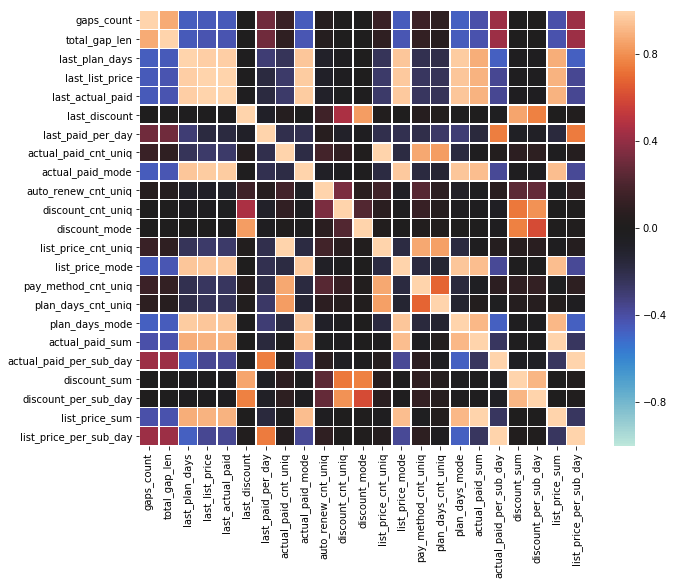

In [55]:
import matplotlib.pyplot as plt

columns_trans = [
 'init_date', 'final_date', 'gaps_count', 'total_gap_len', 'has_long_gap', 'has_expired',
 'last_pay_method', 'last_plan_days', 'last_list_price', 'last_actual_paid', 'last_discount',
 'last_paid_per_day', 'actual_paid_cnt_uniq', 'actual_paid_mode', 'auto_renew_cnt_uniq',
 'auto_renew_mode', 'discount_cnt_uniq', 'discount_mode', 'list_price_cnt_uniq', 'list_price_mode',
 'pay_method_cnt_uniq', 'pay_method_mode', 'plan_days_cnt_uniq', 'plan_days_mode', 'actual_paid_sum',
 'actual_paid_per_sub_day', 'discount_sum', 'discount_per_sub_day', 'list_price_sum', 'list_price_per_sub_day']
columns_trans_numeric = [c for c in columns_trans if col_types[c] in ['int', 'double']]

fig, ax = plt.subplots()
plot_correlation_heatmap(df0, columns_trans_numeric, ax)
fig.set_size_inches(10, 8)
plt.show()

In [52]:
# selected features:
features_trans_select = [
 'total_gap_len',
 'last_list_price',
 'last_paid_per_day',
 'actual_paid_cnt_uniq',
 'auto_renew_cnt_uniq',
 'discount_sum'
]

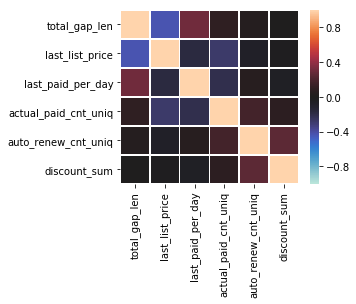

In [59]:
# check
fig, ax = plt.subplots()
plot_correlation_heatmap(df0, features_trans_select, ax)
fig.set_size_inches(4, 3.2)
plt.show()

# user logs
## last 1 week
### last1WeekOnLine > 0

In [67]:
df1 = df0.where('last1WeekOnLine > 0').where('w1_Mtotal > 0')
df1.count()

29367

In [71]:
cols = [
 'last1WeekOnLine',
 'w1_M25', 'w1_M50', 'w1_M75', 'w1_M985', 'w1_M100', 'w1_Munq', 'w1_Msecs', 'w1_Mtotal',
 'w1_M25_D_Mtotal',
 'w1_M50_D_Mtotal',
 'w1_M75_D_Mtotal',
 'w1_M985_D_Mtotal',
 'w1_M100_D_Mtotal',
 'w1_Munq_D_Mtotal',
 'w1_M25M50M75_D_Mtotal',
 'w1_M985M100_D_Mtotal',
 'w1_M25M50_D_Mtotal',
 #'w1_M25_D_M50M75M985M100',  # These features have null values
 #'w1_M25M50_D_M75M985M100', 
 #'w1_M25M50M75_D_M985M100', 
 #'w1_M25M50M75M985_D_M100'
]

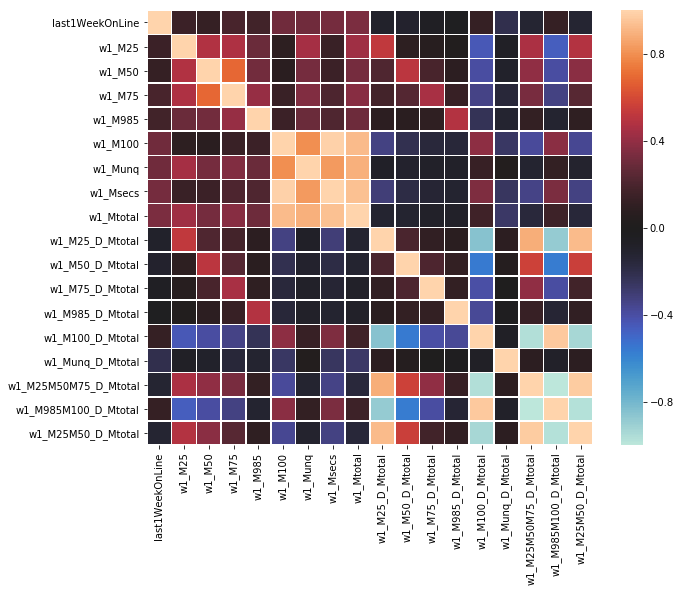

In [72]:
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, cols, ax)
fig.set_size_inches(10, 8)
plt.show()

In [77]:
features_userlogs_last1week_select = [
 'last1WeekOnLine',
 'w1_M75', 
 'w1_M985', 
 'w1_Mtotal',
 'w1_M25_D_Mtotal',
 'w1_M50_D_Mtotal',
 'w1_Munq_D_Mtotal',
]

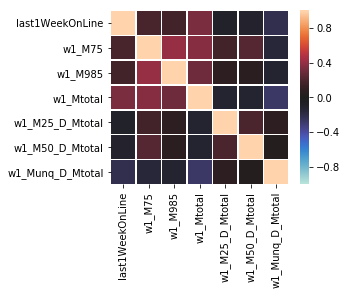

In [78]:
# check
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, features_userlogs_last1week_select, ax)
fig.set_size_inches(4, 3.2)
plt.show()

## last 4 weeks

In [89]:
df1 = df0.where('last4WeekOnLine > 0').where('w4_Mtotal > 0')
df1.count()

32210

In [90]:
cols = [
 'last4WeekOnLine',
 'w4_M25', 'w4_M50', 'w4_M75', 'w4_M985', 'w4_M100', 'w4_Munq', 'w4_Msecs', 'w4_Mtotal',
 'w4_M25_D_Mtotal',
 'w4_M50_D_Mtotal',
 'w4_M75_D_Mtotal',
 'w4_M985_D_Mtotal',
 'w4_M100_D_Mtotal',
 'w4_Munq_D_Mtotal',
 'w4_M25M50M75_D_Mtotal',
 'w4_M985M100_D_Mtotal',
 'w4_M25M50_D_Mtotal',
 #'w4_M25_D_M50M75M985M100', 'w4_M25M50_D_M75M985M100', 'w4_M25M50M75_D_M985M100', 'w4_M25M50M75M985_D_M100'
]

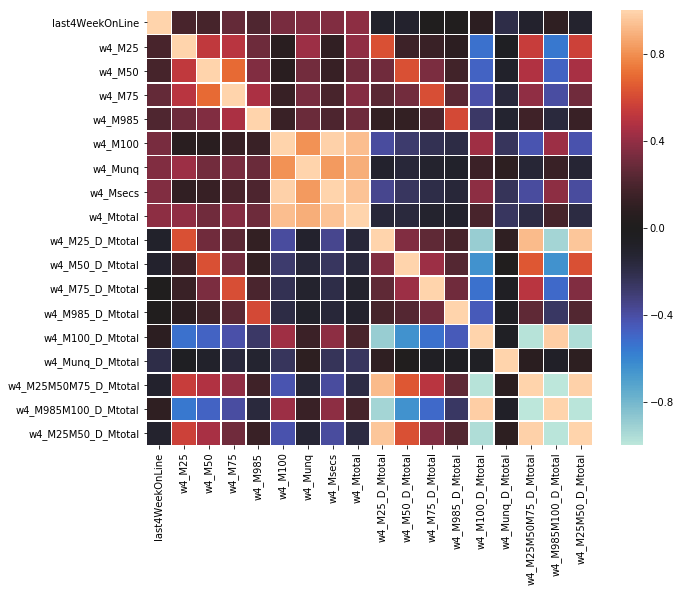

In [91]:
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, cols, ax)
fig.set_size_inches(10, 8)
plt.show()

In [92]:
features_userlogs_last4weeks_select = [
 'last4WeekOnLine',
 'w4_M75', 
 'w4_M985', 
 'w4_Mtotal',
 'w4_M25_D_Mtotal',
 'w4_M50_D_Mtotal',
 'w4_Munq_D_Mtotal',
]

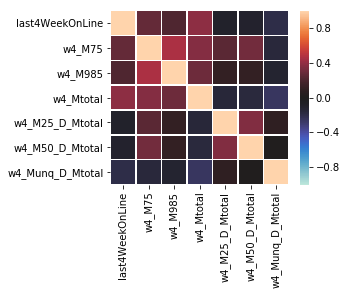

In [93]:
# check
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, features_userlogs_last4weeks_select, ax)
fig.set_size_inches(4, 3.2)
plt.show()

## last 12 weeks

In [79]:
df1 = df0.where('last12WeekOnLine > 0').where('w12_Mtotal > 0')
df1.count()

32730

In [81]:
cols = [
 'last12WeekOnLine',
 'w12_M25', 'w12_M50', 'w12_M75', 'w12_M985', 'w12_M100', 'w12_Munq', 'w12_Msecs', 'w12_Mtotal',
 'w12_M25_D_Mtotal',
 'w12_M50_D_Mtotal',
 'w12_M75_D_Mtotal',
 'w12_M985_D_Mtotal',
 'w12_M100_D_Mtotal',
 'w12_Munq_D_Mtotal',
 'w12_M25M50M75_D_Mtotal',
 'w12_M985M100_D_Mtotal',
 'w12_M25M50_D_Mtotal',
 #'w12_M25_D_M50M75M985M100', 'w12_M25M50_D_M75M985M100', 'w12_M25M50M75_D_M985M100', 'w12_M25M50M75M985_D_M100'
]

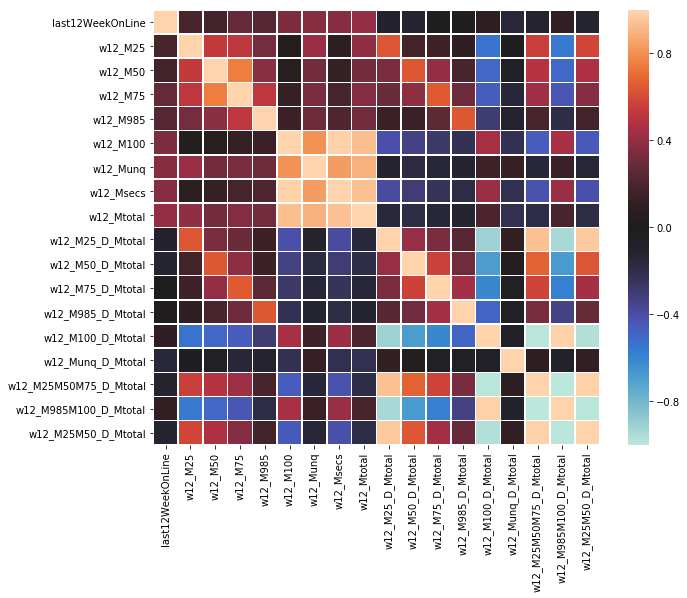

In [82]:
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, cols, ax)
fig.set_size_inches(10, 8)
plt.show()

In [85]:
features_userlogs_last12weeks_select = [
 'last12WeekOnLine',
 'w12_M75', 
 'w12_M985', 
 'w12_Mtotal',
 'w12_M25_D_Mtotal',
 'w12_M50_D_Mtotal',
 'w12_Munq_D_Mtotal',
]

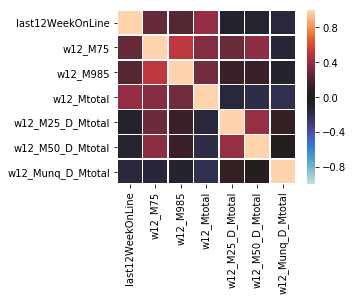

In [88]:
# check
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, features_userlogs_last12weeks_select, ax)
fig.set_size_inches(4, 3.2)
plt.show()

## last 1, 4, 12 weeks
### last1WeekOnLine > 0

In [94]:
df1 = df0.where('last1WeekOnLine > 0').where('w1_Mtotal > 0')
df1.count()

29367

In [95]:
df1.where('last4WeekOnLine > 0').where('w4_Mtotal > 0').count()

29367

In [96]:
df1.where('last12WeekOnLine > 0').where('w12_Mtotal > 0').count()

29367

In [1]:
features_template = [
 'last{}WeekOnLine',
 'w{}_M75', 
 'w{}_M985', 
 'w{}_Mtotal',
 'w{}_M25_D_Mtotal',
 'w{}_M50_D_Mtotal',
 'w{}_Munq_D_Mtotal'
]

cols = []
for f in features_template:
    cols += [f.format(w)  for w in ['1', '4', '12']]
    
cols 

['last1WeekOnLine',
 'last4WeekOnLine',
 'last12WeekOnLine',
 'w1_M75',
 'w4_M75',
 'w12_M75',
 'w1_M985',
 'w4_M985',
 'w12_M985',
 'w1_Mtotal',
 'w4_Mtotal',
 'w12_Mtotal',
 'w1_M25_D_Mtotal',
 'w4_M25_D_Mtotal',
 'w12_M25_D_Mtotal',
 'w1_M50_D_Mtotal',
 'w4_M50_D_Mtotal',
 'w12_M50_D_Mtotal',
 'w1_Munq_D_Mtotal',
 'w4_Munq_D_Mtotal',
 'w12_Munq_D_Mtotal']

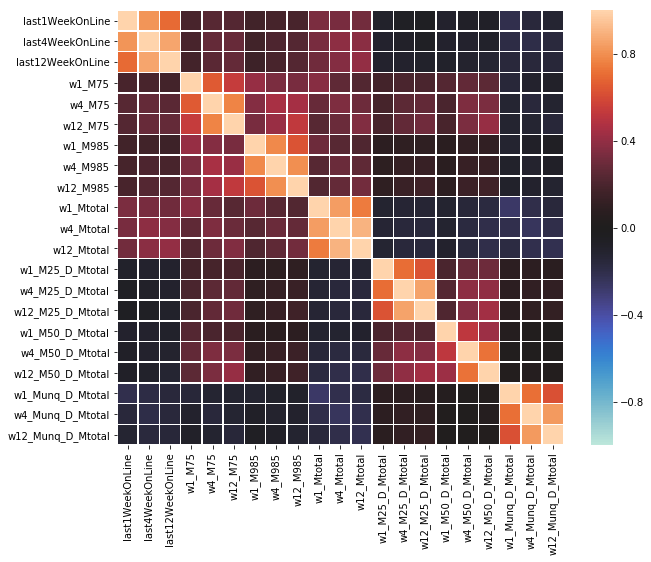

In [99]:
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, cols, ax)
fig.set_size_inches(10, 8)
plt.show()  

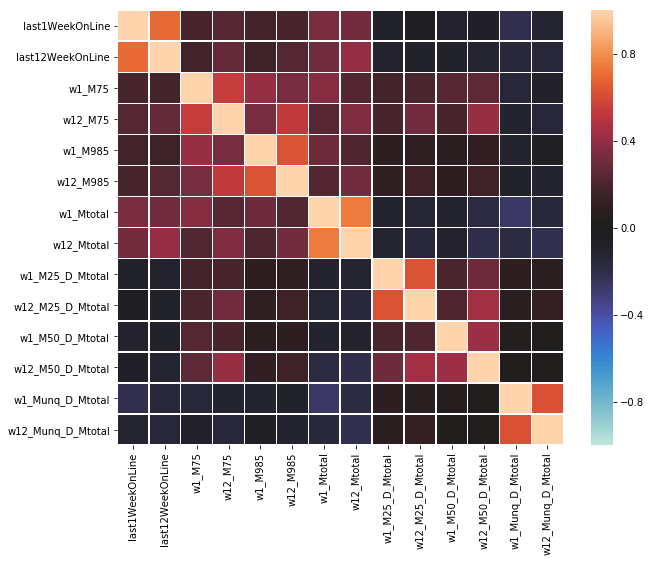

In [100]:
features_template = [
 'last{}WeekOnLine',
 'w{}_M75', 
 'w{}_M985', 
 'w{}_Mtotal',
 'w{}_M25_D_Mtotal',
 'w{}_M50_D_Mtotal',
 'w{}_Munq_D_Mtotal'
]

cols = []
for f in features_template:
    cols += [f.format(w)  for w in ['1', '12']]
    
fig, ax = plt.subplots()
plot_correlation_heatmap(df1, cols, ax)
fig.set_size_inches(10, 8)
plt.show()  

In [111]:
from pyspark.sql.functions import col

features_template = [
 'last{}WeekOnLine',
 'w{}_M75', 
 'w{}_M985', 
 'w{}_Mtotal',
 'w{}_M25_D_Mtotal',
 'w{}_M50_D_Mtotal',
 'w{}_Munq_D_Mtotal'
]

cols = []
for f in features_template:
    cols.append(col(f.format(1)))
    cols.append(col(f.format(12)))
    # new feature:
    cols.append( ((col(f.format(1))+1) / (col(f.format(12))+1)).alias(f.format(1)+'_D_'+f.format(12)) )
    
df2 = df1.select(*cols)

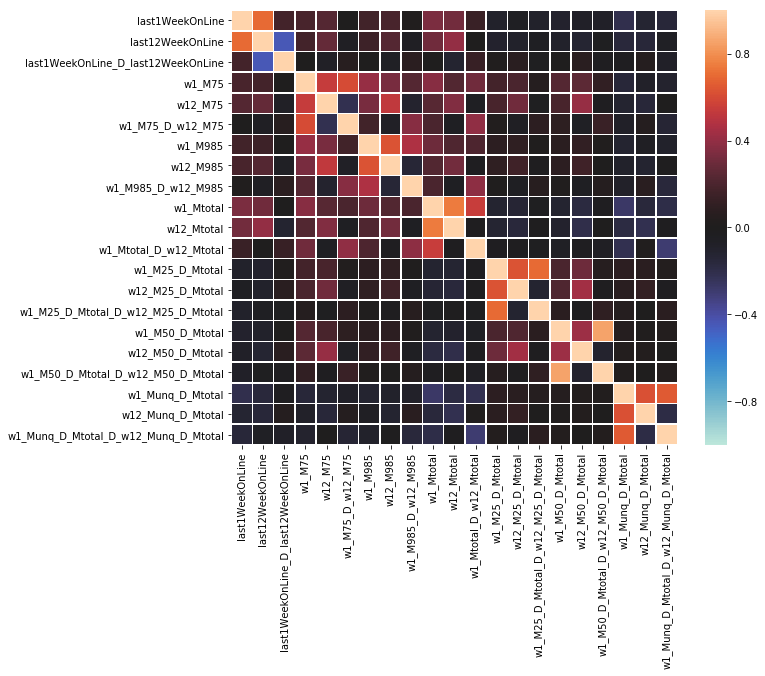

In [112]:
fig, ax = plt.subplots()
plot_correlation_heatmap(df2, df2.columns, ax)
fig.set_size_inches(10, 8)
plt.show()  

In [115]:
cols_select = [
 'last1WeekOnLine',
#  'last12WeekOnLine',
 'last1WeekOnLine_D_last12WeekOnLine',
 'w1_M75',
 'w12_M75',
#  'w1_M75_D_w12_M75',
 'w1_M985',
#  'w12_M985',
 'w1_M985_D_w12_M985',
 'w1_Mtotal',
#  'w12_Mtotal',
 'w1_Mtotal_D_w12_Mtotal',
 'w1_M25_D_Mtotal',
#  'w12_M25_D_Mtotal',
#  'w1_M25_D_Mtotal_D_w12_M25_D_Mtotal',
 'w1_M50_D_Mtotal',
 'w12_M50_D_Mtotal',
#  'w1_M50_D_Mtotal_D_w12_M50_D_Mtotal',
 'w1_Munq_D_Mtotal',
#  'w12_Munq_D_Mtotal',
#  'w1_Munq_D_Mtotal_D_w12_Munq_D_Mtotal'
]

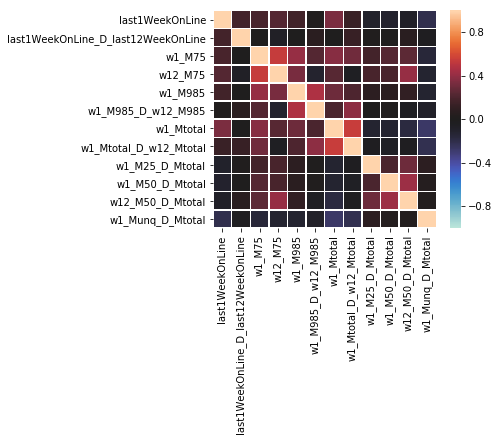

In [117]:
# check
fig, ax = plt.subplots()
plot_correlation_heatmap(df2, cols_select, ax)
fig.set_size_inches(5, 4)
plt.show()  

### last1WeekOnLine = 0
Use data for last 4 weeks.